## Pandas Practice

In [3]:
a = [1, 7, 2]

myvar = pd.Series(a, index = ["x", "y", "z"])

print(myvar)

x    1
y    7
z    2
dtype: int64


### import pandas and a test dataset(iris)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


### Pandas

#### Inspecting dataset using pandas

In [6]:
print(df.shape,'\n')
print(df.info(),'\n')
print(df.describe(),'\n')
print(df.columns,'\n')
print(df['target'].unique(),'\n')

(150, 5) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None 

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.3

#### Selecting/Indexing

In [10]:
print(df.iloc[0],'\n')
print(df.loc[0, 'sepal length (cm)'],'\n')
print(df[['sepal length (cm)', 'petal length (cm)']],'\n')

sepal length (cm)    5.1
sepal width (cm)     3.5
petal length (cm)    1.4
petal width (cm)     0.2
target               0.0
Name: 0, dtype: float64 

5.1 

     sepal length (cm)  petal length (cm)
0                  5.1                1.4
1                  4.9                1.4
2                  4.7                1.3
3                  4.6                1.5
4                  5.0                1.4
..                 ...                ...
145                6.7                5.2
146                6.3                5.0
147                6.5                5.2
148                6.2                5.4
149                5.9                5.1

[150 rows x 2 columns] 



#### Filtering

In [11]:
df[df['sepal length (cm)'] > 5]
print(df['sepal length (cm)'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64


#### group and aggregate

In [12]:
df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


#### Handling null values

In [15]:
print(df.isnull().sum(),'\n')     
df.fillna(df.mean())  

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Numpy

#### Convert pandas dataframe into numpy array

In [16]:
#X will hold the labels and Y will hold the target
X = df.drop('target', axis=1).values 
y = df['target'].values               

#### Basics

In [20]:
print(X.shape,'\n')
print(X[:5],'\n')          
print(np.mean(X, axis=0),'\n')
print(np.std(X, axis=0),'\n')

(150, 4) 

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

[5.84333333 3.05733333 3.758      1.19933333] 

[0.82530129 0.43441097 1.75940407 0.75969263] 



#### Linear Algebra

In [21]:
print(np.dot(X[0], X[1]))        
print(np.linalg.norm(X[0]))       
print(np.cov(X.T))   

37.489999999999995
6.345076831686122
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


#### Sampling and shuffling

In [22]:
np.random.seed(42)       
np.random.shuffle(X) 

### Matplotlib

#### Basic plot

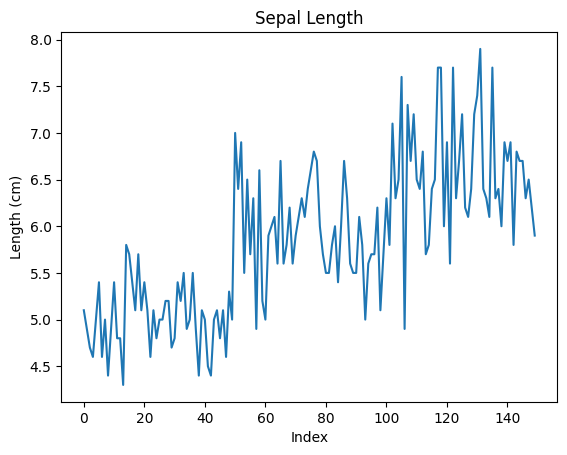

In [23]:
plt.plot(df['sepal length (cm)'])
plt.title("Sepal Length")
plt.xlabel("Index")
plt.ylabel("Length (cm)")
plt.show()

#### Histogram

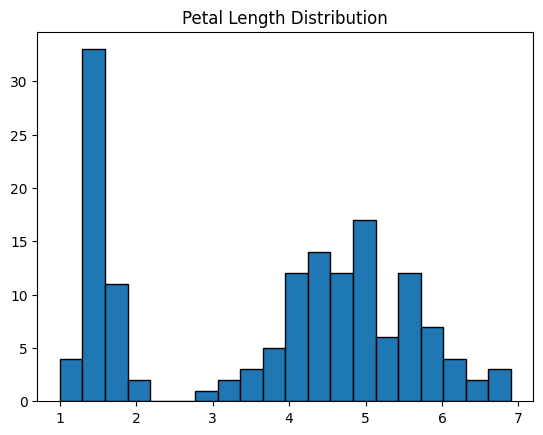

In [24]:
plt.hist(df['petal length (cm)'], bins=20, edgecolor='black')
plt.title("Petal Length Distribution")
plt.show()

#### Scatterplot

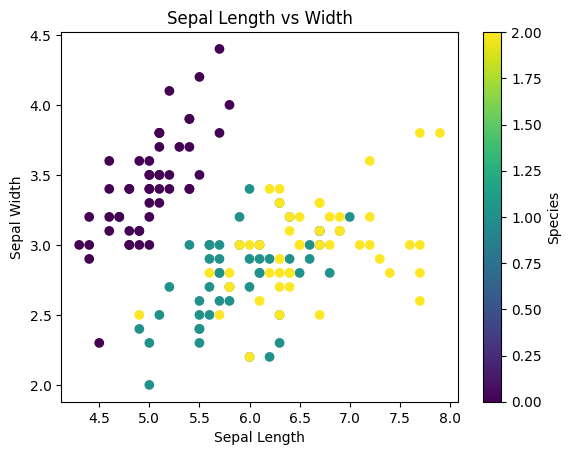

In [25]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=y, cmap='viridis')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Width")
plt.colorbar(label="Species")
plt.show()

#### Boxplot

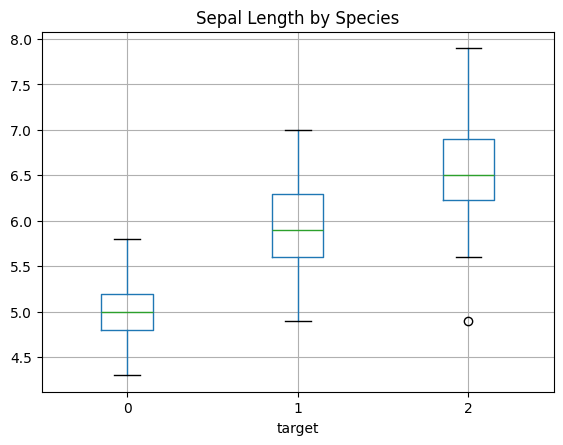

In [26]:
df.boxplot(column='sepal length (cm)', by='target')
plt.title("Sepal Length by Species")
plt.suptitle("")
plt.show()